In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [80]:
file = 'benchmarks/test_intervals.txt'
file = 'benchmarks/test_points.txt'
data_f = open(file, 'r')
data_all = []
for line in data_f.readlines():
    n_interval, val, sigma = line.split(', ')
    data_all += [(int(n_interval), float(val), float(sigma))]
data_f.close()
data_testval = []
data_res = []
data_std = []
i_val = 0;
testval = None;
for i in range(len(data_all)):
    val_test = float(data_all[i][0])
    if val_test != testval:
        testval = val_test
        data_testval += [val_test]
        data_res += [[]]
        data_std += [[]]
        i_val += 1
    data_res[i_val-1] += [float(data_all[i][1])]
    data_std[i_val-1] += [float(data_all[i][2])]
data_violin = []
for i, val in enumerate(data_testval):
    data_violin += [np.array(data_res[i])]
errors = [np.std(data) for data in data_res]
actual_val = 17.2368

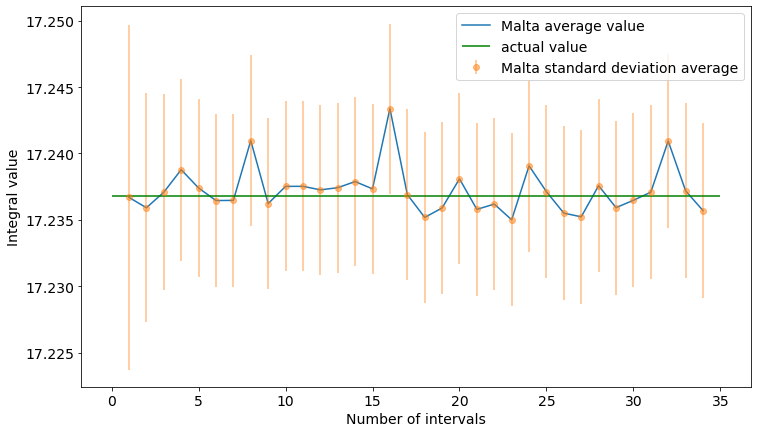

In [74]:
# interval benchmark
%matplotlib inline
font = {'size': 14,
        'weight': 'normal'}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(data_testval, [np.mean(data) for data in data_res], label='Malta average value')
#ax.errorbar(data_testval, [np.mean(data) for data in data_res], yerr=errors, fmt='o', alpha=0.5, label="result standard deviation")
ax.errorbar(data_testval, [np.mean(data) for data in data_res], yerr=[np.mean(x) for x in data_std], fmt='o', alpha=0.5, label="Malta standard deviation average")
#ax.set_title("Benchmark for 100 test runs, 15 iterations")
ax.set_xlabel("Number of intervals")
ax.set_ylabel("Integral value")
ax.hlines(actual_val, 0, 35, color='green', label="actual value")
ax.legend()
pass

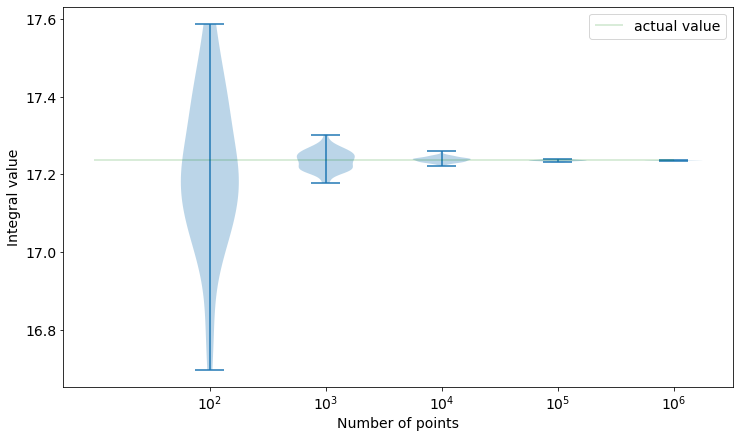

In [81]:
# points benchmark
%matplotlib inline
font = {'size': 14,
        'weight': 'normal'}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(12, 7))
ax.violinplot(data_res)
ax.set_xticks([i+1 for i in range(len(data_testval))], [r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])
ax.hlines(actual_val, 0, 5, color='green', alpha=0.2, label="actual value")
ax.legend()
ax.set_ylabel("Integral value")
ax.set_xlabel("Number of points")
pass

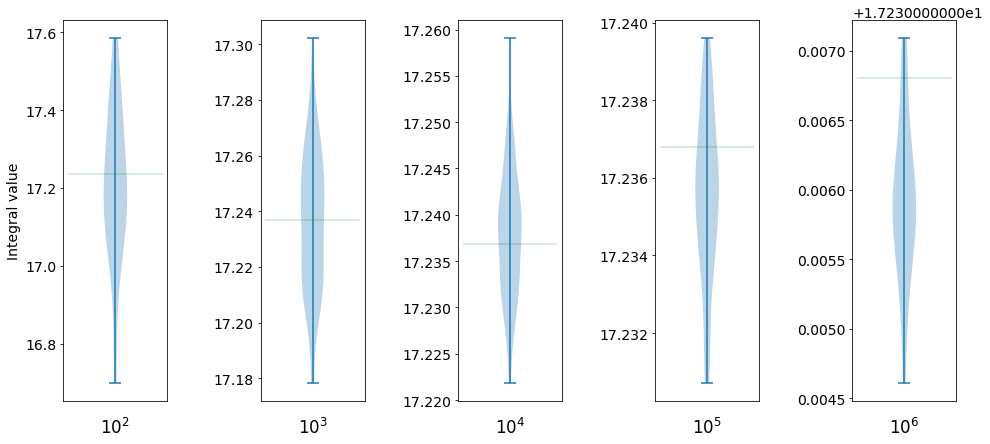

In [82]:
# points benchmark
%matplotlib inline
font = {'size': 14,
        'weight': 'normal'}
plt.rc('font', **font)
show_ix = 0
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 7))
#fig.tight_layout()
fig.subplots_adjust(wspace=0.9)
x_ticks = [r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$']
for show_ix in range(len(data_testval)):
        ax[show_ix].violinplot([data_res[show_ix]])
        ax[show_ix].set_title(x_ticks[show_ix], y=-0.1)
        ax[show_ix].set_xticklabels([])
        ax[show_ix].set_xticks([])
        if show_ix==0: ax[show_ix].set_ylabel("Integral value")
        ax[show_ix].hlines(actual_val, 0, 2, color='green', alpha=0.2, label="actual value")
        #ax[show_ix].set_xlabel("Number of points")
pass

In [72]:
file = 'benchmarks/test_threads.txt'
data_f = open(file, 'r')
data_all = []
for line in data_f.readlines():
    n_interval, t, int_val = line.split(', ')
    data_all += [(int(n_interval), float(t), float(int_val))]
data_f.close()
data_testval = []
data_res = []
data_int_val = []
i_val = 0;
testval = None;
for i in range(len(data_all)):
    val_test = float(data_all[i][0])
    if val_test != testval:
        testval = val_test
        data_testval += [val_test]
        data_res += [[]]
        data_int_val += [[]]
        i_val += 1
    data_res[i_val-1] += [float(data_all[i][1])]
    data_int_val[i_val-1] += [float(data_all[i][2])]
errors = [np.std(data) for data in data_res]
actual_val = 17.2368

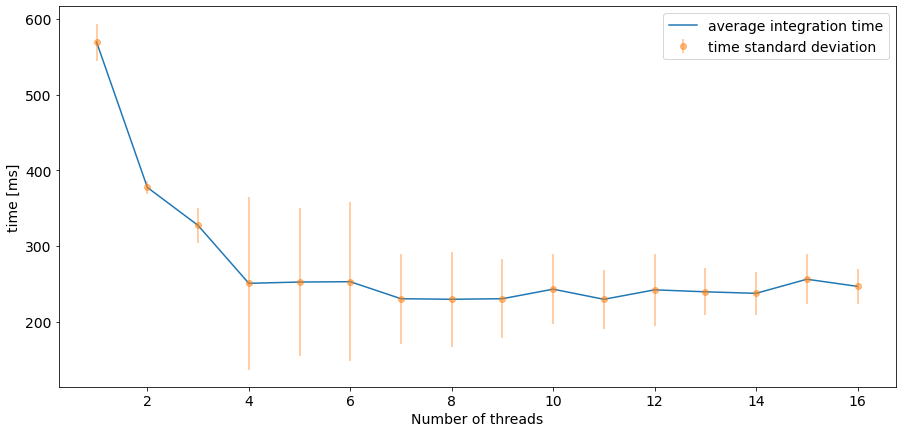

In [77]:
#threads benchmark
%matplotlib inline
font = {'size': 14,
        'weight': 'normal'}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(data_testval, [np.mean(data) for data in data_res], label='average integration time')
ax.errorbar(data_testval, [np.mean(data) for data in data_res], yerr=errors, fmt='o', alpha=0.5, label="time standard deviation")
ax.set_xlabel("Number of threads")
ax.set_ylabel("time [ms]")
ax.legend()
pass

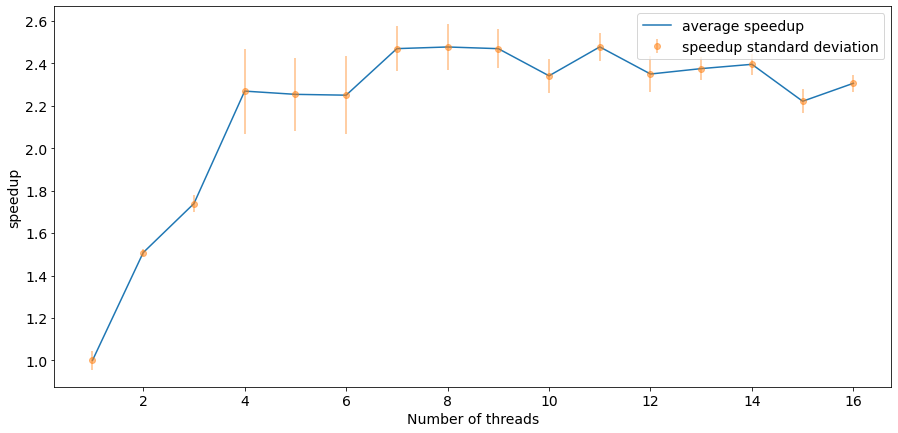

In [78]:
#threads benchmark
%matplotlib inline
font = {'size': 14,
        'weight': 'normal'}
plt.rc('font', **font)
norm = np.mean(data_res[0])
errors_rel = [np.std(np.array(data)/norm) for data in data_res]
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(data_testval, [(norm/np.mean(data)) for data in data_res], label='average speedup')
ax.errorbar(data_testval, [norm/(np.mean(data)) for data in data_res], yerr=errors_rel, fmt='o', alpha=0.5, label="speedup standard deviation")
ax.set_xlabel("Number of threads")
ax.set_ylabel("speedup")
ax.legend()
pass